## SUMMARY

# Model used

XG Boost classifier model is used.
1. Out of the box it implement parallel computation
2. Hardware as well as Software optimization
3. It was developed by Tianqi Chen in C++ but now has interfaces for Python, R, Julia.
4. XGBoost improves the gradient boosting method even further.
5. Unlike the other tree-building algorithms, XGBoost doesn’t use entropy or Gini indices. Instead, it utilises gradient (the error term) and hessian for creating the trees.
5. It gives best accuracy for this dataset.

## Model accuracy

In this XGBoost model is used. For the training dataset after grid search, the accracy score is 0.9828447681382098

All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(varity of wine)

## FEATURE ENGINEERING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the features and the labels
data= pd.read_csv(r'D:\ML course practise\intern\Knight ML Assignment\Data\train.csv')

In [3]:
data.head()

user_name    country  \
0            NaN  Australia   
1  @wawinereport         US   
2            NaN      Italy   
3     @vossroger     France   
4     @vossroger     France   

                                        review_title  \
0  Andrew Peace 2007 Peace Family Vineyard Chardo...   
1  North by Northwest 2014 Red (Columbia Valley (...   
2                  Renato Ratti 2007 Conca  (Barolo)   
3  Domaine l'Ancienne Cure 2010 L'Abbaye White (B...   
4  Château du Cèdre 2012 Le Cèdre Vintage Malbec ...   

                                  review_description            designation  \
0  Classic Chardonnay aromas of apple, pear and h...  Peace Family Vineyard   
1  This wine is near equal parts Syrah and Merlot...                    NaN   
2  Barolo Conca opens with inky dark concentratio...                  Conca   
3  It's impressive what a small addition of Sauvi...               L'Abbaye   
4  This ripe, sweet wine is rich and full of drie...       Le Cèdre Vintage   

   points  price          province                 region_1         region_2  \
0      83   10.0   Australia Other  South Eastern Australia              NaN   
1      89   15.0        Washington     Columbia Valley (WA)  Columbia Valley   
2      94   80.0          Piedmont                   Barolo              NaN   
3      87   22.0  Southwest France             Bergerac Sec              NaN   
4      88   33.0      France Other           Vin de Liqueur              NaN   

                    winery                     variety  
0             Andrew Peace                  Chardonnay  
1       North by Northwest                   Red Blend  
2             Renato Ratti                    Nebbiolo  
3  Domaine l'Ancienne Cure  Bordeaux-style White Blend  
4         Château du Cèdre                      Malbec

In [5]:
data.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

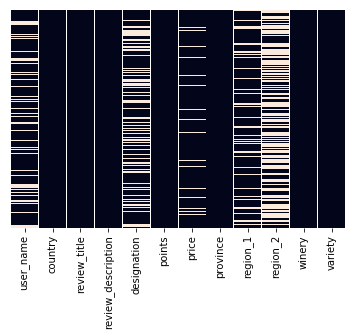

In [6]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [8]:
data['region_2']=data['region_2'].fillna(data['region_2'].mode()[0])
data['price']=data['price'].fillna(data['price'].mean())
data['region_1']=data['region_1'].fillna(data['region_1'].mode()[0])
data['province']=data['province'].fillna(data['province'].mode()[0])
data['designation']=data['designation'].fillna(data['designation'].mode()[0])

In [9]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

## FEATURE SELECTION

user_name,review_title,review_description all unique for every row. so it doesnot used for our model

In [11]:
data.drop(['user_name','review_title','review_description'],axis=1,inplace=True)

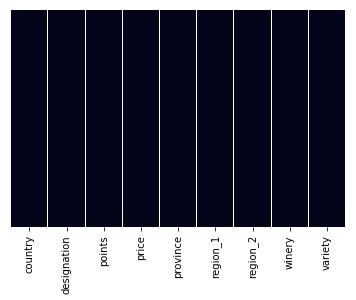

In [12]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [13]:
data.isnull().sum()

country        35
designation     0
points          0
price           0
province        0
region_1        0
region_2        0
winery          0
variety         0
dtype: int64

In [14]:
data['country']=data['country'].fillna(data['country'].mode()[0])

In [15]:
data.isnull().sum()

country        0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
winery         0
variety        0
dtype: int64

## HANDLE CATEGORICAL DATA

In [16]:
data.head()

country            designation  points  price          province  \
0  Australia  Peace Family Vineyard      83   10.0   Australia Other   
1         US                Reserve      89   15.0        Washington   
2      Italy                  Conca      94   80.0          Piedmont   
3     France               L'Abbaye      87   22.0  Southwest France   
4     France       Le Cèdre Vintage      88   33.0      France Other   

                  region_1         region_2                   winery  \
0  South Eastern Australia    Central Coast             Andrew Peace   
1     Columbia Valley (WA)  Columbia Valley       North by Northwest   
2                   Barolo    Central Coast             Renato Ratti   
3             Bergerac Sec    Central Coast  Domaine l'Ancienne Cure   
4           Vin de Liqueur    Central Coast         Château du Cèdre   

                      variety  
0                  Chardonnay  
1                   Red Blend  
2                    Nebbiolo  
3  Bordeaux-style White Blend  
4                      Malbec

In [ ]:
for col in x_train.columns:
    if(col != ['variety']):
        plt.scatter(x_train[col],y_train)
        plt.xlabel(col)
        plt.ylabel('wine variety')
        plt.show()

In [17]:
#function to change the categorical to numerical value
def Encode(d):
    for column in data.columns[~data.columns.isin(['points', 'price','variety'])]:
        data[column] = data[column].factorize()[0]
    return data

wine = Encode(data.copy())
wine.head()

country  designation  points  price  province  region_1  region_2  winery  \
0        0            0      83   10.0         0         0         0       0   
1        1            1      89   15.0         1         1         1       1   
2        2            2      94   80.0         2         2         0       2   
3        3            3      87   22.0         3         3         0       3   
4        3            4      88   33.0         4         4         0       4   

                      variety  
0                  Chardonnay  
1                   Red Blend  
2                    Nebbiolo  
3  Bordeaux-style White Blend  
4                      Malbec

# In this label column in categorical form

Below step to change the variety

In [20]:
print(data['variety'].value_counts().sort_values(ascending=False))

Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

In [22]:
asc=[x for x in data.variety.value_counts().sort_values(ascending=False).index]

In [23]:
a=[]
i=0
for i in range(len(asc)): 
    i=i+1
    a.append(i)
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [24]:
d={}
for i in range(len(asc)):
    d[asc[i]]=a[i]
print(d)

{'Pinot Noir': 1, 'Chardonnay': 2, 'Cabernet Sauvignon': 3, 'Red Blend': 4, 'Bordeaux-style Red Blend': 5, 'Riesling': 6, 'Sauvignon Blanc': 7, 'Syrah': 8, 'Rosé': 9, 'Merlot': 10, 'Nebbiolo': 11, 'Zinfandel': 12, 'Sangiovese': 13, 'Malbec': 14, 'Portuguese Red': 15, 'White Blend': 16, 'Sparkling Blend': 17, 'Tempranillo': 18, 'Rhône-style Red Blend': 19, 'Pinot Gris': 20, 'Champagne Blend': 21, 'Cabernet Franc': 22, 'Grüner Veltliner': 23, 'Portuguese White': 24, 'Pinot Grigio': 25, 'Bordeaux-style White Blend': 26, 'Gewürztraminer': 27, 'Gamay': 28}


In [26]:
a=[]
for i in data['variety']:
    if i in d:
        a.append(d[i])
print(a)

[2, 4, 11, 26, 14, 3, 4, 12, 1, 4, 7, 2, 28, 23, 4, 5, 4, 2, 11, 13, 3, 11, 1, 11, 5, 5, 14, 2, 5, 2, 4, 8, 3, 13, 2, 1, 3, 5, 7, 8, 16, 4, 8, 13, 22, 15, 24, 19, 9, 8, 13, 21, 8, 2, 3, 1, 10, 2, 3, 11, 7, 15, 1, 13, 3, 12, 6, 12, 14, 4, 11, 3, 19, 5, 2, 10, 15, 2, 1, 1, 7, 14, 17, 25, 12, 7, 14, 26, 15, 11, 4, 15, 1, 3, 5, 3, 1, 3, 4, 2, 8, 1, 18, 2, 2, 4, 2, 7, 4, 3, 9, 28, 16, 1, 3, 17, 1, 8, 7, 3, 2, 2, 2, 6, 3, 26, 1, 21, 3, 10, 2, 20, 17, 17, 13, 12, 18, 1, 14, 20, 11, 17, 4, 1, 3, 3, 7, 9, 5, 1, 20, 6, 4, 3, 2, 1, 7, 3, 10, 17, 8, 5, 13, 11, 11, 3, 2, 11, 2, 5, 28, 8, 3, 11, 19, 11, 21, 7, 23, 1, 10, 8, 4, 18, 16, 4, 18, 1, 6, 7, 7, 1, 4, 28, 22, 15, 2, 1, 6, 9, 17, 22, 2, 5, 19, 7, 9, 4, 2, 9, 14, 4, 4, 1, 14, 3, 2, 15, 3, 28, 4, 2, 16, 5, 3, 1, 8, 10, 9, 2, 4, 1, 5, 11, 14, 2, 1, 2, 4, 1, 11, 15, 5, 3, 1, 3, 3, 1, 2, 4, 3, 4, 8, 5, 6, 4, 17, 6, 21, 7, 2, 4, 16, 8, 1, 10, 26, 3, 3, 24, 3, 5, 5, 13, 3, 3, 1, 3, 10, 8, 3, 5, 15, 4, 14, 4, 14, 2, 1, 5, 2, 1, 10, 8, 3, 18, 1, 2, 4,

In [27]:
pred=pd.DataFrame(a)
wine['variety']=pred

In [28]:
wine.head()

country  designation  points  price  province  region_1  region_2  winery  \
0        0            0      83   10.0         0         0         0       0   
1        1            1      89   15.0         1         1         1       1   
2        2            2      94   80.0         2         2         0       2   
3        3            3      87   22.0         3         3         0       3   
4        3            4      88   33.0         4         4         0       4   

   variety  
0        2  
1        4  
2       11  
3       26  
4       14

In [29]:
import matplotlib.pyplot as plt
corr = wine.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
wine.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'winery', 'variety'],
      dtype='object')

By this heatmap province and country co-related

In [30]:
x_train=wine.drop(['variety'],axis=1) 
# 'variety' is the target column which shows the probability of admission for a candidate  
y_train=wine['variety']

# Finding outliers

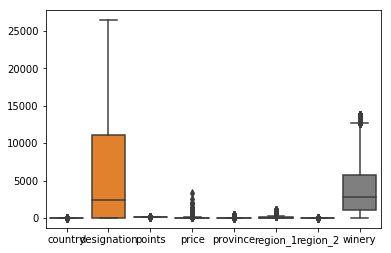

In [31]:
sns.boxplot(data=x_train)

# DATA VISUALIZATION

Text(0, 0.5, 'Y Axis')

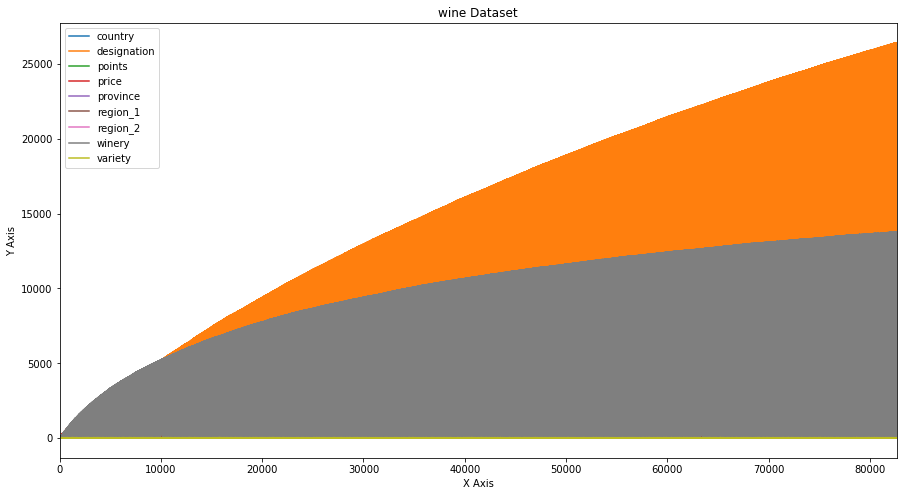

In [32]:
ax = data.plot(figsize=(15,8), title='wine Dataset')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')

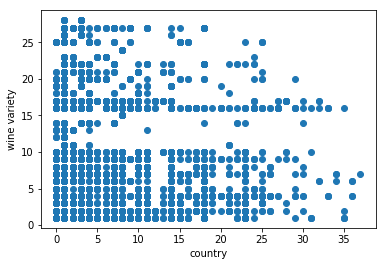

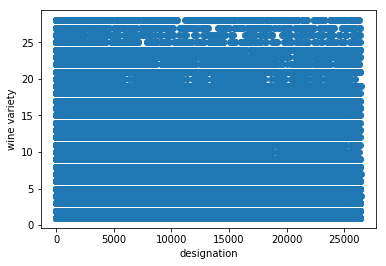

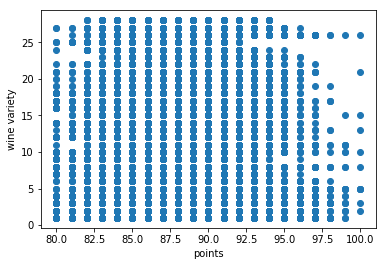

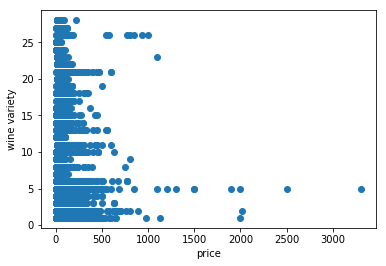

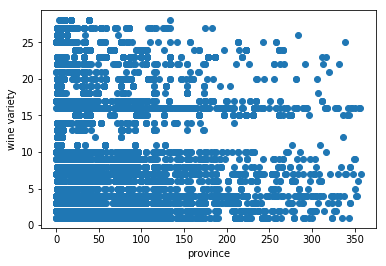

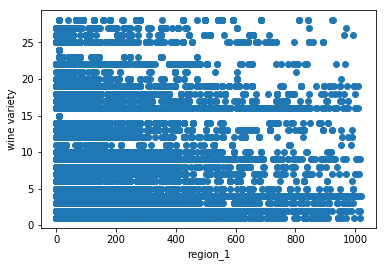

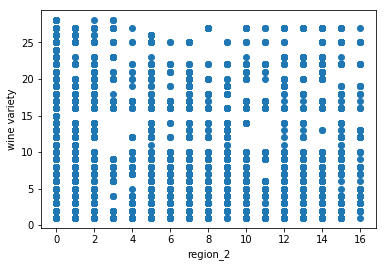

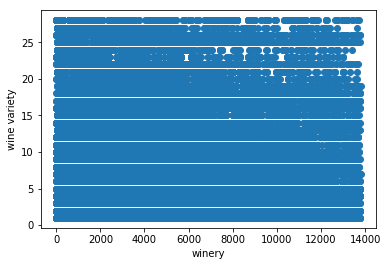

In [37]:
for col in x_train.columns:
    if(col != ['variety']):
        plt.scatter(x_train[col],y_train)
        plt.xlabel(col)
        plt.ylabel('wine variety')
        plt.show()

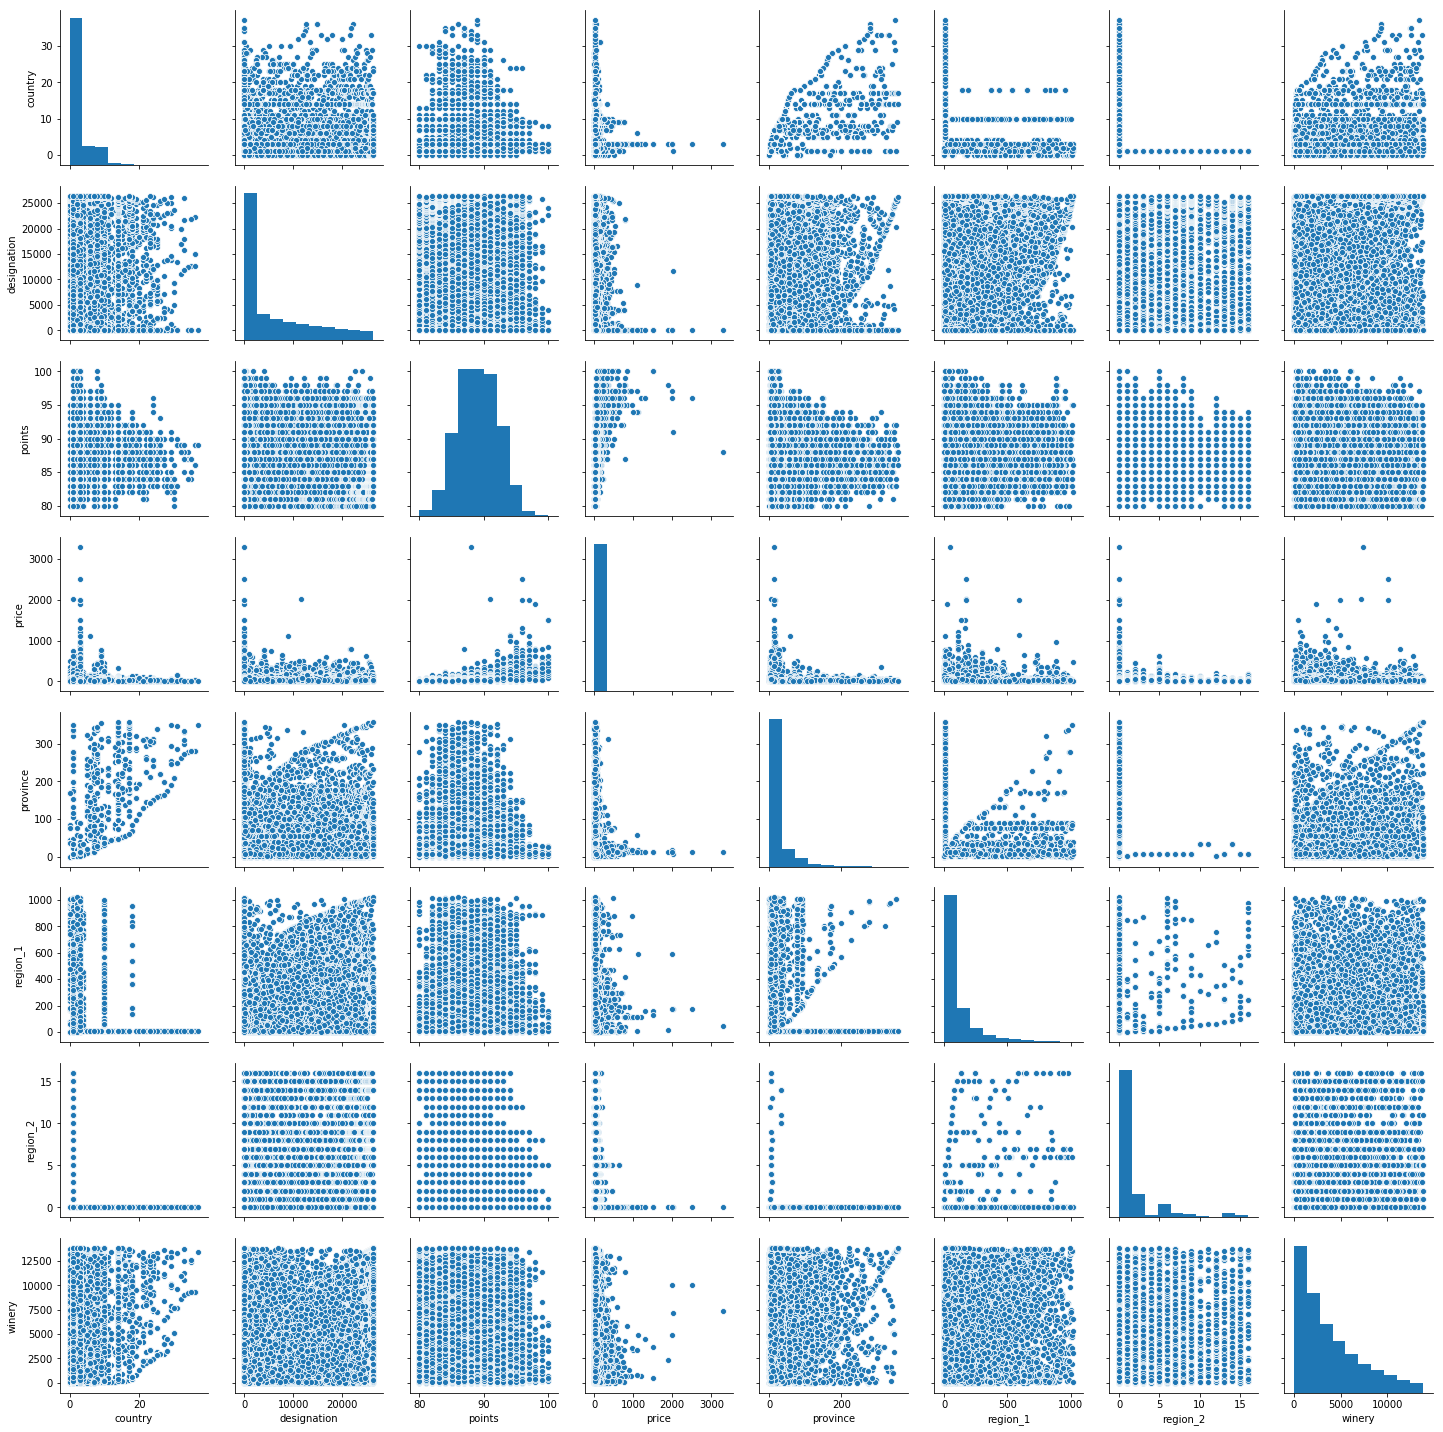

In [38]:
sns.pairplot(x_train)

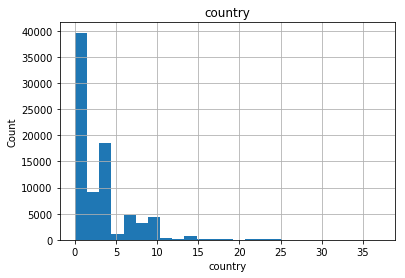

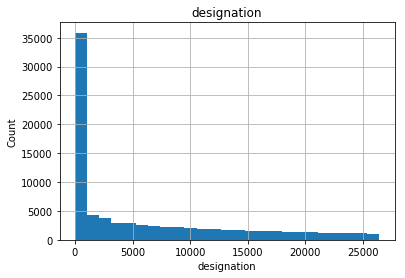

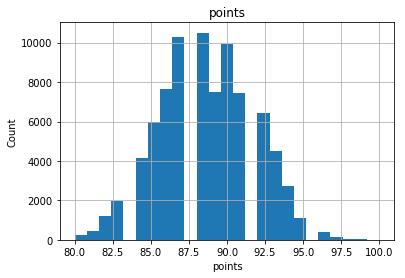

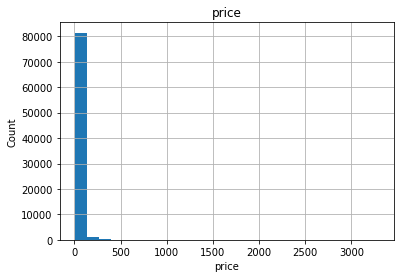

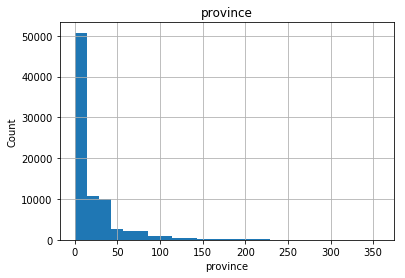

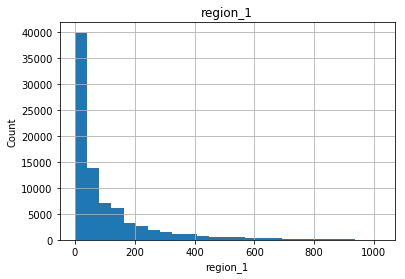

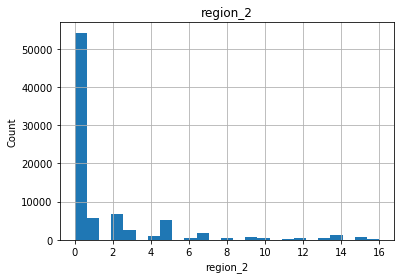

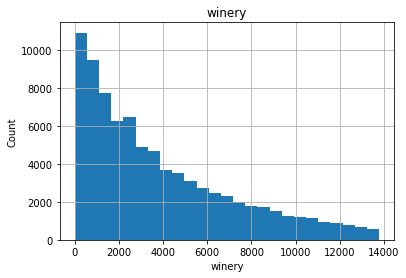

In [41]:
for feature in data:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()